In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [4]:
def create_mlp(activation="relu", dropout_rate=0.0, hidden_units=[256, 128]):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for units in hidden_units:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [5]:
model = create_mlp(activation="relu")

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8757 - loss: 0.4295 - val_accuracy: 0.9703 - val_loss: 0.1006
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9707 - loss: 0.0956 - val_accuracy: 0.9718 - val_loss: 0.0958
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9806 - loss: 0.0611 - val_accuracy: 0.9765 - val_loss: 0.0883
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9859 - loss: 0.0433 - val_accuracy: 0.9757 - val_loss: 0.0952
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9901 - loss: 0.0296 - val_accuracy: 0.9807 - val_loss: 0.0769
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9924 - loss: 0.0238 - val_accuracy: 0.9775 - val_loss: 0.0851
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9778 - val_loss: 0.0921
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9797000288963318


In [7]:
for act in ["relu", "tanh", "sigmoid"]:
    print(f"\nTraining with activation = {act}")
    model = create_mlp(activation=act)
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy using {act}: {acc:.4f}")



Training with activation = relu
Accuracy using relu: 0.9782

Training with activation = tanh
Accuracy using tanh: 0.9753

Training with activation = sigmoid
Accuracy using sigmoid: 0.9738


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [9]:
model = create_mlp(hidden_units=[512, 256, 128])


In [10]:
model.fit(X_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8790 - loss: 0.4285
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9733 - loss: 0.0881
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9836 - loss: 0.0525
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9881 - loss: 0.0371
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9906 - loss: 0.0285
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9928 - loss: 0.0231
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9930 - loss: 0.0215
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9935 - loss: 0.0189
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9958 - loss: 0.0127


In [11]:
model = create_mlp(dropout_rate=0.2)


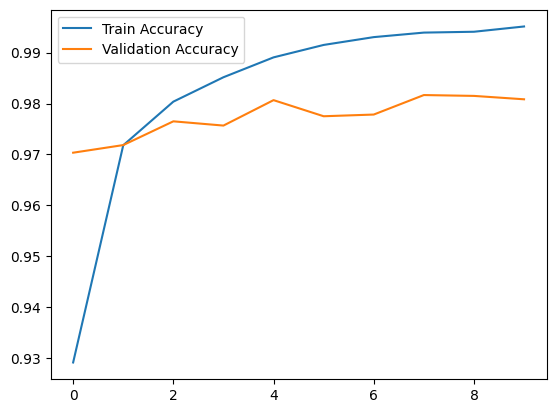

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
